# Stack Overflow

## Introduction 

In the second part of this assignment, you will choose to create and analyze time series of creation dates of Stack Overflow questions, or Stack Overflow answers. You need to choose only one of the two, but please mention clearly what kind of time series you created. This assignment is to be completed **INDIVIDUALLY** and is due on **October 6 at 5pm**.

As stated above, you need to create time series of Stack Overflow questions, or answers using their creation dates. In order to do so you should use the information derived from Homework 1.1. Note that the focus of this homework is not on data collection, but on data analysis and interpretation so do not worry if you did not collect all data in the previous homework.

You are going to analyze users. If you selected to create time series of questions take the top 100 users with the most question posts, while if you created time series of answers take the top 100 users with the highest answer scores. For each user, your time series will be the number of questions (for questions), or the score value (for answers) posted by that user at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at a certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze users asking questions and sample during different hours of the day, your hypothesis could be that some users ask more questions during night hours because they are students, while others are more active during day time because they work in industry.   

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data (your hypothesis), what timeseries you created, what method you chose and why. Providing us with novel, or more than one hypotheses/analyses will give you extra credit. **(20 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

In [9]:
# File imports
import xml.etree.ElementTree as ET
import pandas as pd
import pandas_datareader.data as web
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import numpy as np
from collections import defaultdict
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [165]:
#Parsing the data 
tree = 'stackoverflow-posts-2015.xml'
user_id = []

for events, elem in ET.iterparse(tree, events=("start", "end")):
    question = defaultdict(dict)
    answer = defaultdict(dict)
    try: 
        if events == "start":
            if elem.attrib['PostTypeId']=='1': 
                userId = elem.attrib['OwnerUserId']
                datetime = elem.attrib['CreationDate']
                user_id.append([datetime, 1, userId])
                elem.clear()
            
    except: continue
    

# Grouping the dataframe by User ID and Setting the index value as Datetime
gb = pd.DataFrame(user_id, columns = ['Datetime', 'Count', 'UserId'])
gb = gb.set_index('Datetime')
gb = gb.groupby('UserId')

In [179]:
matrix_100 = np.zeros((100,31))
grp = []
top_100 = gb.size().sort_values(ascending=False).index
top_100 = top_100[:100]

# Getting the total number of posts of each user in an hour 
for i in range(100):
    series_idx = pd.date_range('1-1-2015', '7-1-2015', freq='D')
    df_new = pd.DataFrame(0, columns=['Count'], index= series_idx)
    grp = gb.get_group(top_100[i])
    grp.index = pd.to_datetime(grp.index)
    grp = grp.append(df_new)
    grp = grp.groupby([grp.index.day])
    matrix_100[i] = (grp.sum().values).T

In [180]:
#Calculating the euclidean distance matrix for the top 100 users
dist_matrix = euclidean_distances(matrix_100)

# Getting the user id of most different users
I = dist_matrix.argmax()
I_max = np.unravel_index(I, dist_matrix.shape)
dist_matrix = np.ma.masked_equal(dist_matrix, 0.0, copy=False)

# Getting the user id of most similar users
I = dist_matrix.argmin()
I_min = np.unravel_index(I, dist_matrix.shape)

In [168]:
print(I_max[1])

88


In [173]:
# Dataframe of different users
max_users = []
min_users = []

user = gb.get_group(top_100[I_max[0]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.hour]).sum()
max_users.append(user)
    
user = gb.get_group(top_100[I_max[1]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.day]).sum()
max_users.append(user)

In [174]:
# Dataframe of similar users
user = gb.get_group(top_100[I_min[0]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.hour]).sum()
min_users.append(user)
    
user = gb.get_group(top_100[I_min[1]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.day]).sum()
min_users.append(user)


Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

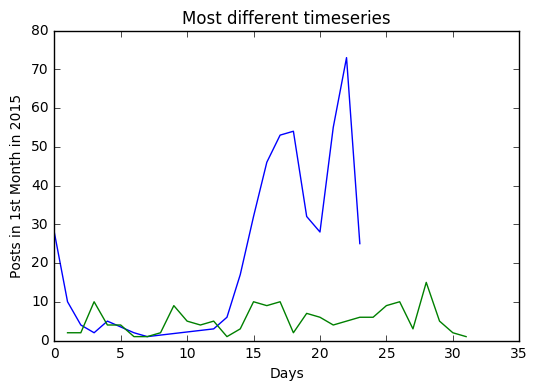

In [203]:
#Plotting the most different users
plt.plot(max_users[0])
plt.plot(max_users[1])
plt.ylabel('Posts in 1st Month in 2015')
plt.xlabel('Days')
plt.title('Most different timeseries')
plt.show()

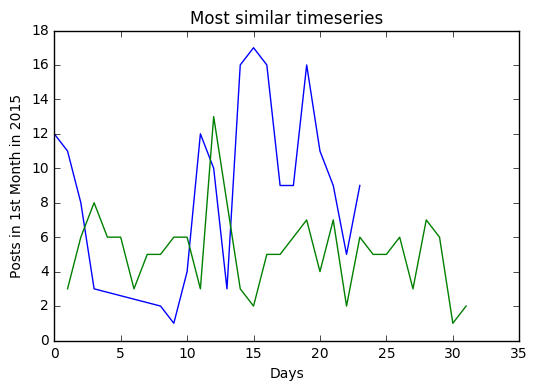

In [204]:
#Plotting the most similar users
plt.plot(min_users[0])
plt.plot(min_users[1])
plt.ylabel('Posts in 1st Month in 2015')
plt.xlabel('Days')
plt.title('Most similar timeseries')
plt.show()

What are your interpretation/conclusions from the above plotting comparisons? **(5 pts)**

In [206]:
#I plotted the most similar and different time series for a month of user activity and the following conclusions were derived

# (1) The users with the most dissimilar activity the lesser posts are mostly from people during business days when they 
#     are in the office.
# (2) The users with greater posts are posting during particular days of a month maybe due to a project deadline or exam 
#     mostly students
# (3) The users in most similar posts are mostly showing a trend of peak during particular days and almost similar conculsion 
#     can be derived from it

-----------------

Choose a different distance/similarity metric and repeat the same time series analysis. **(5 pts)**

In [183]:
#Calculating the euclidean distance matrix for the top 100 users
dist_matrix_1 = cosine_similarity(matrix_100)

# Getting the user id of most different users
I_1 = dist_matrix_1.argmax()
I_max_1 = np.unravel_index(I_1, dist_matrix_1.shape)
dist_matrix_1 = np.ma.masked_equal(dist_matrix_1, 0.0, copy=False)

# Getting the user id of most similar users
I_2 = dist_matrix_1.argmin()
I_min_1 = np.unravel_index(I_2, dist_matrix_1.shape)

In [184]:
# Dataframe of different users
max_users_1 = []
user = gb.get_group(top_100[I_max_1[0]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.day]).sum()
max_users_1.append(user)
    
user = gb.get_group(top_100[I_max[1]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.day]).sum()
max_users_1.append(user)

In [185]:
# Dataframe of Similar users
min_users_1 = []
user = gb.get_group(top_100[I_min[0]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.hour]).sum()
min_users_1.append(user)
    
user = gb.get_group(top_100[I_min[1]])
user.index = pd.to_datetime(user.index)
user = user.append(df_new)
user = user.groupby([user.index.day]).sum()
min_users_1.append(user)

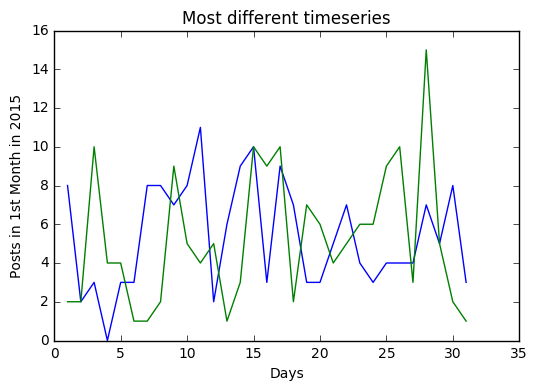

In [197]:
#Plotting the most similar users
plt.plot(max_users_1[0])
plt.plot(max_users_1[1])
plt.ylabel('Posts in 1st Month in 2015')
plt.xlabel('Days')
plt.title('Most different timeseries')
plt.show()

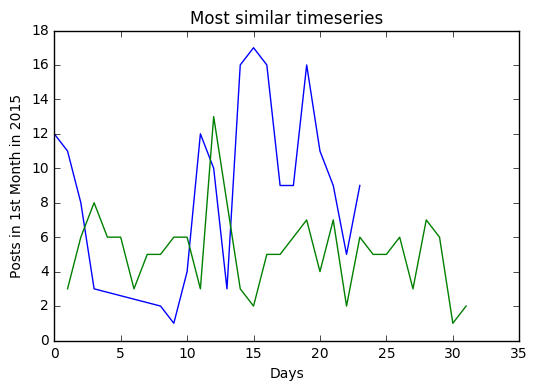

In [198]:
#Plotting the most different and similar users

plt.plot(min_users_1[0])
plt.plot(min_users_1[1])
plt.ylabel('Posts in 1st Month in 2015')
plt.xlabel('Days')
plt.title('Most similar timeseries')
plt.show()

Compare the two different metrics you used and report any observations. Why did you select the specific metrics? Which do you think performed better based on the results you were expecting and why? **(5 pts)**

In [ ]:
# The two different metircs which I used are euclidean distances and cosine similarity. The cosine similarity performed better
# as it gives a deeper and more clear insight of the data which we are analyzing